In [16]:
"""CREEDS

The exercise here is to quantify HOW many diseases are there and the format of the data

Structure:
    1. Imports, Variables, Functions
    2. Retrieve Data
    3. Retrieve Signatures
"""
# 1. Imports, Variables, Functions
# imports
import json, pandas as pd, os, sys

df_data_info = pd.read_csv(data_info_path)

# variables
data_path_manual = "../data/CREEDS/disease_signatures-v1.0.json"
data_path_automated = "../data/CREEDS/disease_signatures-p1.0.json"
output_dir = "../results/figures/CREEDS"

# 2. Retrieve Data
# Load the data from the file
with open(data_path_manual, "r") as f:
    data_manual = json.load(f)

with open(data_path_automated, "r") as f:
    data_automated = json.load(f)


# Convert the data into a pandas DataFrame
df_manual = pd.DataFrame(data_manual)
df_automated = pd.DataFrame(data_automated)

# 3. Retrieve Signatures
# Get the unique diseases
unique_diseases_manual = df_manual[df_manual["organism"] == "human"][
    "disease_name"
].unique()
unique_diseases_automated = df_automated[df_automated["organism"] == "human"][
    "disease_name"
].unique()

# Print the number of unique diseases
print(
    f"There are {len(unique_diseases_manual)} unique diseases for manual curation in human organism."
)
print(
    f"There are {len(unique_diseases_automated)} unique diseases for automated curation in human organism."
)

There are 229 unique diseases for manual curation in human organism.
There are 128 unique diseases for automated curation in human organism.


In [51]:
df_manual

,do_id,cell_type,pert_ids,umls_cui,geo_id,platform,version,ctrl_ids,down_genes,up_genes,disease_name,organism,id,curator
0,DOID:11723,Muscle - Striated (Skeletal) (MMHCC),"[GSM4377, GSM4378, GSM4379, GSM4380, GSM4381]",C0013264,GSE466,GPL81,1.0,"[GSM4372, GSM4373, GSM4374, GSM4375, GSM4376]","[[Rpl41, -0.1526295691728592], [Tnnt3, -0.1450...","[[Actc1, 0.1277850866317749], [Lyz1, 0.1037828...",Duchenne muscular dystrophy,mouse,dz:328,Joel.Dudley
1,None,Ganglioneuroblastoma,"[GSM282584, GSM282585, GSM282586, GSM282590, G...",C0028043,GSE11208,GPL570,1.0,"[GSM282582, GSM282583, GSM282587, GSM282588, G...","[[BEX1, -0.08722281455993652], [ZNF423, -0.077...","[[RPS18, 0.19893527030944824], [COX2, 0.193066...",Nicotine addiction,human,dz:325,Joel.Dudley
2,None,Nose,"[GSM286646, GSM286647, GSM286648, GSM286652, G...",C0276447,GSE11348,GPL570,1.0,"[GSM286649, GSM286650, GSM286651, GSM286655, G...","[[HLA-DRB4, -0.2605530321598053], [BPIFB1, -0....","[[FCGBP, 0.1933731883764267], [S100A4, 0.19266...",Rhinovirus infection,human,dz:324,Joel.Dudley
3,DOID:12930,Myocardial tissue,"[GSM82408, GSM82409, GSM82410, GSM82411, GSM82...",C0007193,GSE3586,GPL3050,1.0,"[GSM82393, GSM82394, GSM82395, GSM82396, GSM82...","[[CKM, -0.20369680225849152], [SMPX, -0.177489...","[[MB, 0.3557915985584259], [MYL2, 0.2121689766...",dilated cardiomyopathy,human,dz:323,Joel.Dudley
4,DOID:104,Peripheral blood mononuclear cell,"[GSM66617, GSM66618, GSM66619, GSM66620, GSM66...",C0004623,GSE3026,GPL8300,1.0,"[GSM66671, GSM66672, GSM66673, GSM66674, GSM66...","[[RPS27, -0.20674751698970795], [CD74, -0.1724...","[[HLA-DRB5, 0.26361608505249023], [IGHA2, 0.16...",bacterial infectious disease,human,dz:322,Joel.Dudley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,DOID:3151,Skin from SCCs and Normal human epidermis,"[GSM1098449, GSM1098450, GSM1098451, GSM109845...",C0553723,GSE45164,GPL571,1.0,"[GSM1098446, GSM1098447, GSM1098448]","[[CST6, -0.16002681851387024], [KRT2, -0.13491...","[[DEFB4A, 0.2018461525440216], [S100A7, 0.1836...",skin squamous cell carcinoma,human,dz:657,cadimo
824,DOID:684,Hepatocellular carcinoma and Adjacent non-tumo...,"[GSM1481293, GSM1481295, GSM1481297, GSM148129...",C0279607,GSE60502,GPL96,1.0,"[GSM1481292, GSM1481294, GSM1481296, GSM148129...","[[MT2A, -0.17223264276981354], [CYP2B7P, -0.16...","[[SPINK1, 0.16987518966197968], [GPC3, 0.10506...",hepatocellular carcinoma,human,dz:656,cadimo
825,DOID:8719,Normal urothelium cells and CIS cells,"[GSM1579327, GSM1579328]",C0007099,GSE64756,GPL1261,1.0,"[GSM1579325, GSM1579326]","[[Upk3a, -0.17264053225517273], [Adh1, -0.1088...","[[Sprr2f, 0.16374744474887848], [Krt15, 0.1540...",in situ carcinoma,mouse,dz:655,cadimo
826,None,Anaplastic thyroid carcinoma tissue and Normal...,"[GSM1588026, GSM1588027, GSM1588028, GSM158802...",C0238461,GSE65144,GPL570,1.0,"[GSM1588038, GSM1588039, GSM1588040, GSM158804...","[[TG, -0.4695512056350708], [TFF3, -0.12417372...","[[LGALS1, 0.20619834959506989], [TMSB10, 0.178...",anaplastic thyroid carcinoma,human,dz:654,cadimo


In [23]:
len(set([s[0] for sublist in df_manual["down_genes"].to_list() for s in sublist]))
list(set([s[0] for sublist in df_manual["down_genes"].to_list() for s in sublist]))[:10]

['Cadm1',
 'Zdhhc7',
 'TNFRSF21',
 '2310050C09Rik',
 'TXNDC9',
 'NSMF',
 'Lmtk2',
 'Psd2',
 'Rcan1',
 'Adamts10']

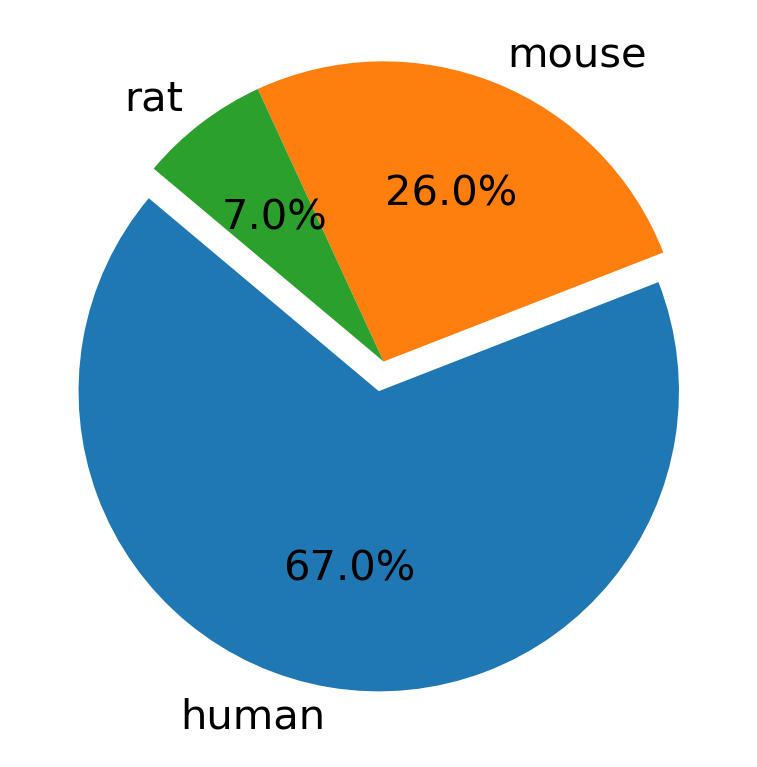

In [50]:
from collections import Counter
import matplotlib.pyplot as plt

# Provided data
data = Counter(df_manual["organism"].to_list())
data_sorted = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))
# Preparing data for plotting
labels = data_sorted.keys()
sizes = data_sorted.values()
explode = (0.1, 0, 0)  # only "explode" the largest slice (human)

# Creating the pie chart
plt.figure(figsize=(3, 3), dpi=300)
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=140)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Showing the plot
plt.savefig("../results/figures/CREEDS/organisms.png", bbox_inches="tight")

In [12]:
len(
    set(df_manual["disease_name"].unique()).union(
        set(df_automated["disease_name"].unique())
    )
)

473

In [9]:
set(df_manual["disease_name"].unique())

{'APECED - Autoimmune polyendocrinopathy-candidiasis-ectodermal dystrophy',
 'Acute Lung Injury',
 'Acute arthritis',
 'Adenovirus infection',
 'Alcohol poisoning',
 'Alexander disease',
 "Alzheimer's disease",
 'Anaplasmosis',
 'Arrhythmogenic Right Ventricular Cardiomyopathy',
 "Barrett's esophagus",
 'Bone fracture',
 'Burn',
 'Carcinoma in situ of large intestine',
 'Carcinoma in situ of small intestine',
 'Cardiac Hypertrophy',
 'Cardiomyopathy',
 'Chronic Lymphocytic Leukemia (Chronic B-lymphocytic leukemia)',
 "Crohn's disease",
 'Decompensated cardiac failure',
 'Dehydration',
 'Dental cavity, complex',
 'Diabetic Nephropathy',
 'Diamond-Blackfan anemia',
 'Down syndrome',
 'Duchenne muscular dystrophy',
 'Ebola hemorrhagic fever',
 'Eczema',
 'Emery-Dreifuss muscular dystrophy',
 'Epithelial proliferation',
 'Erectile dysfunction associated with type 2 diabetes mellitus',
 'Escherichia coli infection of the central nervous system',
 'Familial hypophosphataemic rickets',
 'Frac

In [42]:
df_automated.shape

(1430, 11)

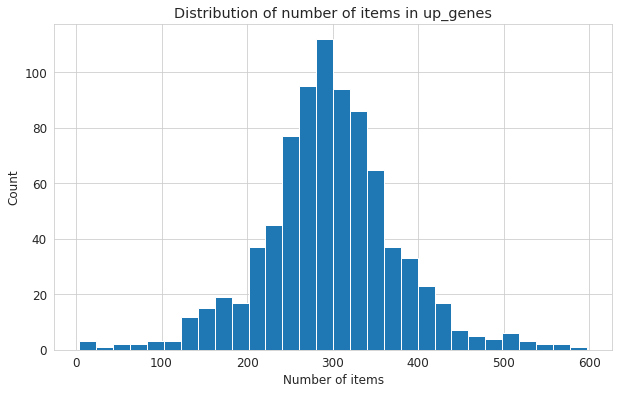

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns, matplotlib

# Nature-like style settings
font = {"family": "DejaVu Sans", "weight": "normal", "size": 12}
matplotlib.rc("font", **font)

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the columns
categorical_columns = ["organism", "disease_name"]
list_columns = ["pert_ids", "ctrl_ids", "down_genes", "up_genes"]

# Plot for categorical columns with pie charts
for col in categorical_columns:
    # Get value counts
    counts = df_manual[col].value_counts()

    # Calculate 10% threshold
    threshold = 0.10 * len(df_manual)

    # Create a mask for values above the threshold
    mask = (counts / counts.sum() * 100) >= 10
    tail = counts.loc[~mask]

    # Rename categories below the threshold
    counts = counts.loc[mask]
    counts["Other (Minority Labels)"] = tail.sum()

    # Plot
    plt.close()
    plt.figure(figsize=(10, 8))
    counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, legend=True)
    plt.title(f"Distribution of {col}")
    plt.ylabel("")  # This is to remove the column name as label for y-axis
    # Save the plot to output directory with dpi 300
    plt.savefig(
        os.path.join(output_dir, f"{col}_distribution_pie_chart.manual.png"),
        dpi=300,
        bbox_inches="tight",
    )

# Plot for list columns
for col in list_columns:
    plt.close()
    plt.figure(figsize=(10, 6))
    # Count the number of items in each list and plot
    df_manual[col].apply(len).hist(bins=30)
    plt.title(f"Distribution of number of items in {col}")
    plt.xlabel("Number of items")
    plt.ylabel("Count")
    # Save the plot to output directory with dpi 300
    plt.savefig(
        os.path.join(output_dir, f"{col}_distribution_histogram.manual.png"),
        dpi=300,
        bbox_inches="tight",
    )

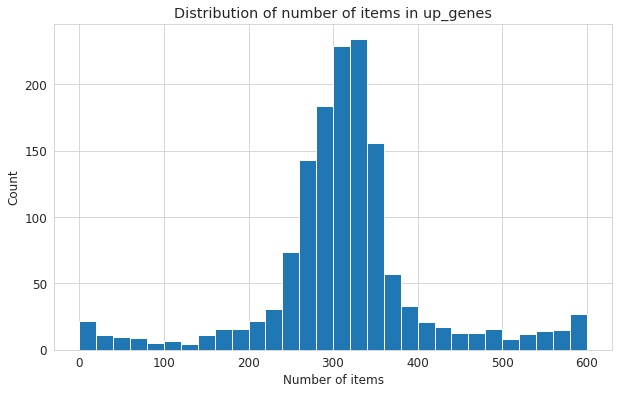

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns, matplotlib

# Nature-like style settings
font = {"family": "DejaVu Sans", "weight": "normal", "size": 12}
matplotlib.rc("font", **font)

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the columns
categorical_columns = ["organism", "disease_name"]
list_columns = ["pert_ids", "ctrl_ids", "down_genes", "up_genes"]

# Plot for categorical columns with pie charts
for col in categorical_columns:
    # Get value counts
    counts = df_automated[col].value_counts()

    # Calculate 10% threshold
    threshold = 0.10 * len(df_automated)

    # Create a mask for values above the threshold
    mask = (counts / counts.sum() * 100) >= 10
    tail = counts.loc[~mask]

    # Rename categories below the threshold
    counts = counts.loc[mask]
    counts["Other (Minority Labels)"] = tail.sum()

    # Plot
    plt.close()
    plt.figure(figsize=(10, 8))
    counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, legend=True)
    plt.title(f"Distribution of {col}")
    plt.ylabel("")  # This is to remove the column name as label for y-axis
    # Save the plot to output directory with dpi 300
    plt.savefig(
        os.path.join(output_dir, f"{col}_distribution_pie_chart.automated.png"),
        dpi=300,
        bbox_inches="tight",
    )

# Plot for list columns
for col in list_columns:
    plt.close()
    plt.figure(figsize=(10, 6))
    # Count the number of items in each list and plot
    df_automated[col].apply(len).hist(bins=30)
    plt.title(f"Distribution of number of items in {col}")
    plt.xlabel("Number of items")
    plt.ylabel("Count")
    # Save the plot to output directory with dpi 300
    plt.savefig(
        os.path.join(output_dir, f"{col}_distribution_histogram.automated.png"),
        dpi=300,
        bbox_inches="tight",
    )